In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.spatial.distance import pdist, squareform


# CC Library
What are the Hamming distances between designed tiles?

In [2]:
# What is the distance between HawkBCss?
initial_HawkBCs_qual = initial[initial["HawkBCs_qual"] == True]
initial_HawkBCs_qual_counts = pd.DataFrame(initial_HawkBCs_qual["HawkBCs"].value_counts()).reset_index()
initial_HawkBCs_qual_unique = initial_HawkBCs_qual_counts["HawkBCs"]
HawkBCs_dist = nearest_neighbors_parallel_df(list(initial_HawkBCs_qual_unique))
HawkBCs_dist

NameError: name 'initial' is not defined

In [4]:
design_file = pd.read_csv("../../data/DNA_Tiles_nkx2_2.txt",header=None)
design_file

,0
0,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...
1,TACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCG...
2,GACCAGAGCAACAGAGCCGGCACCTTCCAGGCCGGCATTCCCTTCA...
3,CCTCCCGCCATCATCGACAAGACCTTCCAGGCCGGCATTCCCTTCA...
4,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...
...,...
230,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...
231,ACCGACGCCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...
232,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...
233,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...


In [5]:
# def add_min_hamming_dist(seq_list):
#     # Step 1: Convert to 2D char array
#     seq_array = np.array([list(seq) for seq in seq_list])

#     # Step 2: Compute pairwise Hamming distances
#     dist_matrix = pdist(seq_array, metric=lambda u, v: np.sum(u != v))
#     dist_matrix_square = squareform(dist_matrix)

#     # Step 3: Set diagonal to inf and compute minimum per sequence
#     np.fill_diagonal(dist_matrix_square, np.inf)
#     min_pairwise_distances = np.min(dist_matrix_square, axis=1)

#     # Step 4: Combine tiles and min distances into a DataFrame
#     df = pd.DataFrame({
#         'Tile': seq_list,
#         'Min_Hamming_Distance': min_pairwise_distances
#     })

#     return df

In [6]:
# def hamming_distance(seq1, seq2):
#     """Compute Hamming distance between two equal-length sequences."""
#     return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

# def add_min_hamming_dist(query_seqs, ref_seqs=None, n_jobs=-1, batch_size=100):
#     """
#     Compute the minimum Hamming distance for each sequence in query_seqs 
#     against all sequences in ref_seqs (or within query_seqs if ref_seqs is None).

#     Args:
#         query_seqs (list[str]): Sequences to evaluate.
#         ref_seqs (list[str] | None): Reference sequences. If None, use query_seqs.
#         n_jobs (int): Number of parallel jobs (default = -1, all cores).
#         batch_size (int): Chunk size for parallelization.

#     Returns:
#         pd.DataFrame: query sequence + min hamming distance.
#     """
#     if ref_seqs is None:
#         ref_seqs = query_seqs
    
#     # Ensure array format
#     query_seqs = np.array(query_seqs)
#     ref_seqs = np.array(ref_seqs)

#     def min_dist_for_seq(seq, ref_seqs):
#         dists = (hamming_distance(seq, ref) for ref in ref_seqs if ref != seq)
#         return min(dists, default=np.inf)

#     # Parallel with progress bar
#     results = Parallel(n_jobs=n_jobs, batch_size=batch_size)(
#         delayed(min_dist_for_seq)(seq, ref_seqs) for seq in tqdm(query_seqs, desc="Computing min Hamming")
#     )

#     return pd.DataFrame({
#         "Tile": query_seqs,
#         "Min_Hamming_Distance": results
#     })

In [7]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from rapidfuzz.distance import Hamming

def add_min_hamming_dist(query_seqs, ref_seqs=None, batch_size=1000):
    """
    Compute the minimum Hamming distance for each sequence in query_seqs
    against all sequences in ref_seqs (or within query_seqs if ref_seqs is None).

    Args:
        query_seqs (list[str]): Sequences to evaluate.
        ref_seqs (list[str] | None): Reference sequences. If None, use query_seqs.
        batch_size (int): Number of queries to process at once.

    Returns:
        pd.DataFrame: query sequence + min hamming distance.
    """
    if ref_seqs is None:
        ref_seqs = query_seqs

    query_seqs = np.array(query_seqs, dtype="U")
    ref_seqs = np.array(ref_seqs, dtype="U")

    results = []
    for i in tqdm(range(0, len(query_seqs), batch_size), desc="Computing min Hamming"):
        batch = query_seqs[i:i+batch_size]
        for q in batch:
            dists = (Hamming.distance(q, r) for r in ref_seqs if r != q)
            results.append(min(dists, default=np.inf))

    return pd.DataFrame({
        "Tile": query_seqs,
        "Min_Hamming_Distance": results
    })


ModuleNotFoundError: No module named 'rapidfuzz'

In [6]:
EC_design_file = pd.read_csv("../data/a10_designfile.csv")
EC_design_file

,ArrayDNA
0,ATGGCTTTGAGAATTGAAGTTTATAATAGAATTGAATCTTCTACTG...
1,GAAGTTTATAATAGAATTGAATCTTCTACTGCTTCTACTGCTTTGC...
2,ATTGAATCTTCTACTGCTTCTACTGCTTTGCAAAGACAAGATTTGA...
3,GCTTCTACTGCTTTGCAAAGACAAGATTTGAGATATACATTTAGAT...
4,CAAAGACAAGATTTGAGATATACATTTAGATCTAATGCTAGAGCTG...
...,...
20778,GCTAAAGTTGATACTGAAGAAGAAGATAAGACTATGGTTGATTCTA...
20779,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...
20780,ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...
20781,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...


In [7]:
# # How similar are Emily's sequences to one another?
# EC_df = add_min_hamming_dist(EC_design_file["ArrayDNA"])
# EC_df.to_csv("../data/EC_design_file_hamming_dist.csv")

In [9]:
EC_df = pd.read_csv("../data/EC_design_file_hamming_dist.csv", index_col = 0)
EC_df

,Tile,Min_Hamming_Distance
0,ATGGCTTTGAGAATTGAAGTTTATAATAGAATTGAATCTTCTACTG...,58
1,GAAGTTTATAATAGAATTGAATCTTCTACTGCTTCTACTGCTTTGC...,49
2,ATTGAATCTTCTACTGCTTCTACTGCTTTGCAAAGACAAGATTTGA...,39
3,GCTTCTACTGCTTTGCAAAGACAAGATTTGAGATATACATTTAGAT...,28
4,CAAAGACAAGATTTGAGATATACATTTAGATCTAATGCTAGAGCTG...,16
...,...,...
20778,GCTAAAGTTGATACTGAAGAAGAAGATAAGACTATGGTTGATTCTA...,52
20779,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,8
20780,ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...,13
20781,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...,2


In [10]:
# 90% of sequences in Emily's library have a minimum hamming distance over 6
EC_df[EC_df["Min_Hamming_Distance"] > 6]

,Tile,Min_Hamming_Distance
0,ATGGCTTTGAGAATTGAAGTTTATAATAGAATTGAATCTTCTACTG...,58
1,GAAGTTTATAATAGAATTGAATCTTCTACTGCTTCTACTGCTTTGC...,49
2,ATTGAATCTTCTACTGCTTCTACTGCTTTGCAAAGACAAGATTTGA...,39
3,GCTTCTACTGCTTTGCAAAGACAAGATTTGAGATATACATTTAGAT...,28
4,CAAAGACAAGATTTGAGATATACATTTAGATCTAATGCTAGAGCTG...,16
...,...,...
20777,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,53
20778,GCTAAAGTTGATACTGAAGAAGAAGATAAGACTATGGTTGATTCTA...,52
20779,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,8
20780,ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...,13


In [11]:
EC_df["Min_Hamming_Distance"].value_counts()

Min_Hamming_Distance
58    656
59    630
57    629
56    603
55    596
     ... 
63    169
64     84
65     33
66     21
67      6
Name: count, Length: 67, dtype: int64

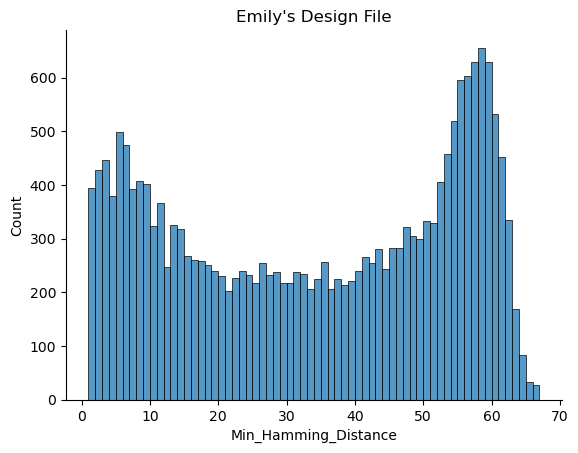

In [12]:
import matplotlib.pyplot as plt
plt.title("Emily's Design File")
sns.histplot(EC_df["Min_Hamming_Distance"], binwidth = 1)
sns.despine()

In [13]:
CC_df = add_min_hamming_dist(design_file[0])
CC_df

Computing min Hamming: 100%|██████████| 1/1 [00:00<00:00, 47.17it/s]


,Tile,Min_Hamming_Distance
0,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1
1,TACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCG...,92
2,GACCAGAGCAACAGAGCCGGCACCTTCCAGGCCGGCATTCCCTTCA...,8
3,CCTCCCGCCATCATCGACAAGACCTTCCAGGCCGGCATTCCCTTCA...,10
4,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,12
...,...,...
230,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
231,ACCGACGCCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,18
232,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
233,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,74


In [14]:
CC_df[CC_df["Min_Hamming_Distance"] > 3]

,Tile,Min_Hamming_Distance
1,TACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCG...,92
2,GACCAGAGCAACAGAGCCGGCACCTTCCAGGCCGGCATTCCCTTCA...,8
3,CCTCCCGCCATCATCGACAAGACCTTCCAGGCCGGCATTCCCTTCA...,10
4,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,12
5,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,13
...,...,...
230,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
231,ACCGACGCCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,18
232,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
233,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,74


In [15]:
CC_df["Min_Hamming_Distance"].value_counts()

Min_Hamming_Distance
2     74
1     25
4     22
50    21
3     13
6     11
10    10
5     10
12     8
9      5
16     4
7      4
8      4
15     3
18     3
14     3
13     3
76     2
20     2
11     2
92     1
46     1
17     1
66     1
74     1
65     1
Name: count, dtype: int64

In [16]:
# Only 25% of sequences in Caitlin's design file have hamming distance over 6
CC_df[CC_df["Min_Hamming_Distance"] > 6]

,Tile,Min_Hamming_Distance
1,TACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCG...,92
2,GACCAGAGCAACAGAGCCGGCACCTTCCAGGCCGGCATTCCCTTCA...,8
3,CCTCCCGCCATCATCGACAAGACCTTCCAGGCCGGCATTCCCTTCA...,10
4,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,12
5,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,13
...,...,...
230,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
231,ACCGACGCCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,18
232,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
233,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,74


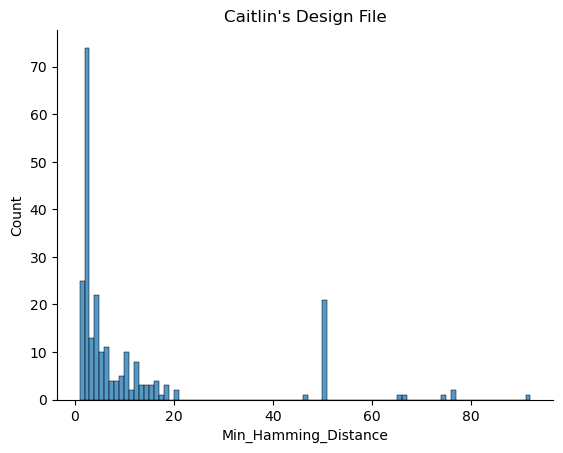

In [17]:
plt.title("Caitlin's Design File")
sns.histplot(CC_df["Min_Hamming_Distance"], binwidth = 1)
sns.despine()

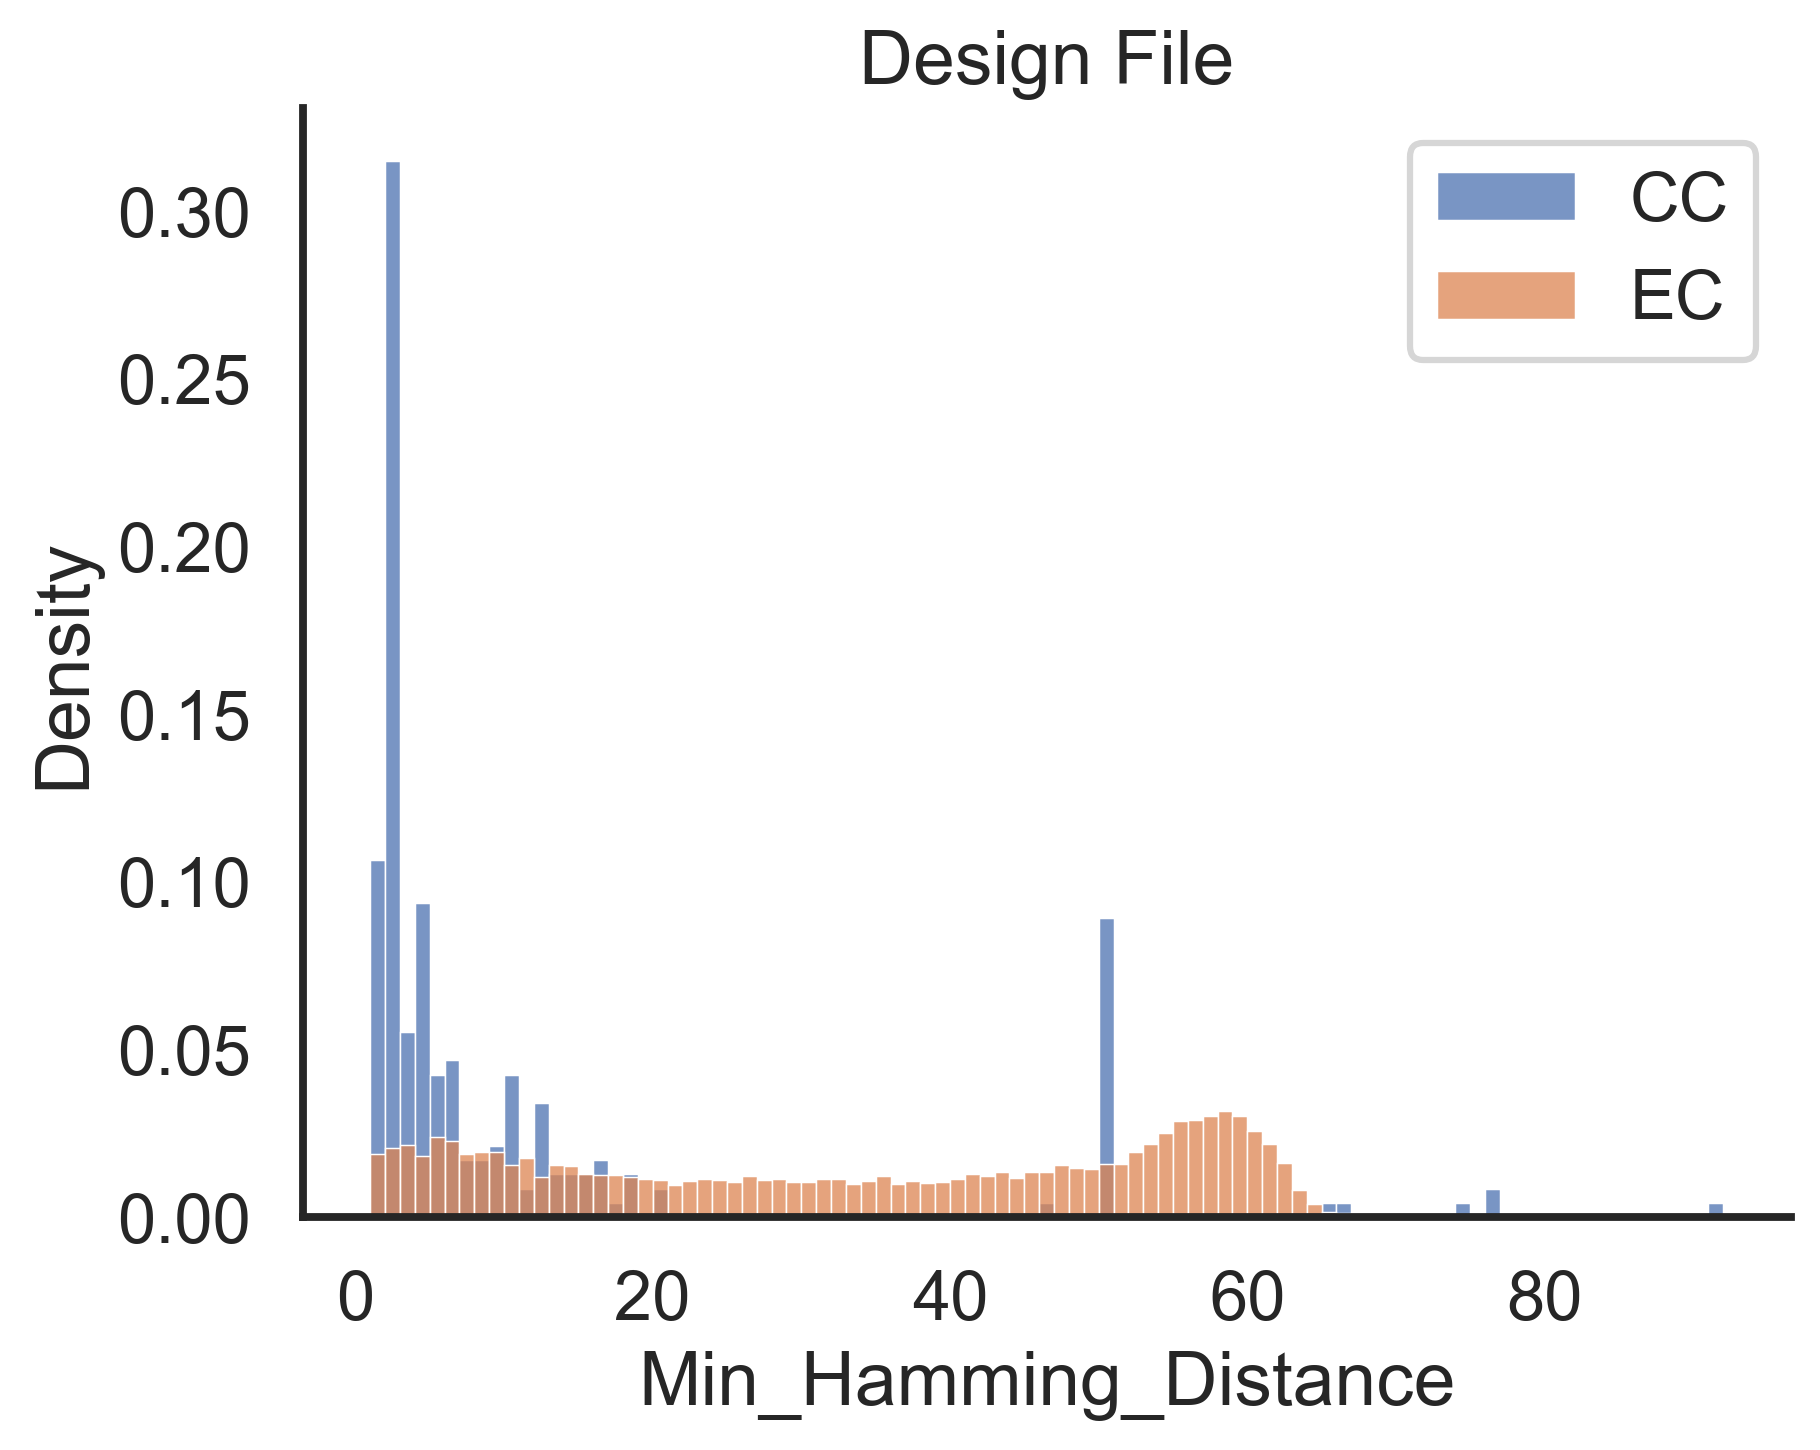

In [184]:
sns.set_context('talk')
plt.figure(dpi = 300)
plt.title("Design File")
sns.histplot(CC_df["Min_Hamming_Distance"], binwidth = 1, stat = 'density', label = "CC")
sns.histplot(EC_df["Min_Hamming_Distance"], binwidth = 1, stat = 'density', label = "EC")
plt.legend()
sns.despine()

Does each AD have only 1 Hawkins BC?

In [21]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
from dask.diagnostics import ProgressBar
import duckdb

os.chdir("../scripts")
from mapping import BarcodeMapper
from map_refiner import MapRefiner

In [22]:
mapper = BarcodeMapper(['../data/Staller_Tl4s1_MVS_0035_I1TTGTCACCAA_CGCACGAACA_S326.fastq.gz.assembled.fastq'],
                        "../data/DNA_Tiles_nkx2_2.txt",
                        ["ADBC2", "HawkBCs", "RTBC", "AD"],
                        ["CTCGAGATAACTTCGTATAATGTATGCTAT", "GAGCTCGCTAGC", "GGCCGGCCATAGGGCCCC", "CACCATG"],
                        ["GGCCGGCCATAGGGCCCC", "CTCGAGATAA", "GCGGTCCA", "GGATCCG"],
                        [6, 9, 16, 162],
                      reverse_complement=False)
mapped_df = mapper.create_map()
mapped_df.head()

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
0,NaN,False,NaN,False,NaN,False,NaN,False,0.0
1,NaN,False,ACCAAGATC,True,NaN,False,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,0.0
2,NaN,False,NaN,False,NaN,False,NaN,False,0.0
3,NaN,False,NaN,False,NaN,False,NaN,False,0.0
4,NaN,False,NaN,False,NaN,False,NaN,False,0.0


In [23]:
mapper.save_parquet('../output/CC_nkx2_2.parquet')

[########################################] | 100% Completed | 780.18 ms


In [24]:
refiner = MapRefiner(db_path = "../duckdb/CC_nkx2_2",
                      cols = ["ADBC2", "HawkBCs", "RTBC", "AD"],
                     reads_threshold = 5,
                     column_pairs = [("AD", ("ADBC2", "HawkBCs")), (("ADBC2", "HawkBCs"), "RTBC")])

In [25]:
refiner.create_map1_initial('../output/CC_nkx2_2.parquet/*')
initial = refiner.get_map_df('map1_initial')
initial

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
0,None,False,None,False,None,False,None,False,0
1,None,False,ACCAAGATC,True,None,False,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,0
2,None,False,None,False,None,False,None,False,0
3,None,False,None,False,None,False,None,False,0
4,None,False,None,False,None,False,None,False,0
...,...,...,...,...,...,...,...,...,...
77530,GGGCGA,True,CCATCGACA,True,TAGCTAGAGTAAATTT,True,GACTCTCCCGGACCCGGCGCCACACCTCACGACAGCGCTCCCTACG...,True,1
77531,TGATCC,True,CCGTGTTGT,True,TGGTACGTAAATCTAC,True,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,True,1
77532,TATATC,True,ATAGCACAC,True,ATCTGACTACGCGGTA,True,GTCCAGGACGCCGCCGCCGCCACCGCCCAGGCCGGCATTCCCGCCA...,True,0
77533,TGAACC,True,ATCAGGACC,True,ACATATAAAAAGATAT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,True,1


In [26]:
# initial map must have correct length of AD, ADBC2, Hawk BC, and RTBC
quality = initial[(initial["ADBC2_qual"] == True) & (initial["HawkBCs_qual"] == True) & (initial["RTBC_qual"] == True) & (initial["AD_qual"] == True)]
quality

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
9,CGATCC,True,CCACATCAT,True,GTAAAGTAGTAAATAC,True,AGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCG...,True,1
10,ACAGAC,True,ACAAGCGTT,True,CGATAATTTAGAATGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,1
11,GAATTG,True,AACCTACGC,True,TAGCGTATTGAGCGAA,True,GCCCAGGACCTGAGCAGCCTGACCTTCCAGGCCGGCATTCCCTTCA...,True,1
12,ACCAGA,True,ACATTGCCG,True,AGAATTTGTTCGTCTG,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGAGCAGCGGCGCCTACT...,True,1
14,GCTTGC,True,AAGGATCTG,True,TCTAATAGTGGATCGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,1
...,...,...,...,...,...,...,...,...,...
77530,GGGCGA,True,CCATCGACA,True,TAGCTAGAGTAAATTT,True,GACTCTCCCGGACCCGGCGCCACACCTCACGACAGCGCTCCCTACG...,True,1
77531,TGATCC,True,CCGTGTTGT,True,TGGTACGTAAATCTAC,True,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,True,1
77532,TATATC,True,ATAGCACAC,True,ATCTGACTACGCGGTA,True,GTCCAGGACGCCGCCGCCGCCACCGCCCAGGCCGGCATTCCCGCCA...,True,0
77533,TGAACC,True,ATCAGGACC,True,ACATATAAAAAGATAT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,True,1


In [27]:
quality_designed = quality[quality["Designed"] == 1]
quality_designed

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
9,CGATCC,True,CCACATCAT,True,GTAAAGTAGTAAATAC,True,AGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCG...,True,1
10,ACAGAC,True,ACAAGCGTT,True,CGATAATTTAGAATGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,1
11,GAATTG,True,AACCTACGC,True,TAGCGTATTGAGCGAA,True,GCCCAGGACCTGAGCAGCCTGACCTTCCAGGCCGGCATTCCCTTCA...,True,1
12,ACCAGA,True,ACATTGCCG,True,AGAATTTGTTCGTCTG,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGAGCAGCGGCGCCTACT...,True,1
14,GCTTGC,True,AAGGATCTG,True,TCTAATAGTGGATCGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,1
...,...,...,...,...,...,...,...,...,...
77529,CAATCA,True,CCAGAAGAT,True,ATGAACAAGCTCGGCA,True,GAGGAGCCTCAGAGCGATCCCAGCGTGGAGCCTCCTCTGAGCCAGG...,True,1
77530,GGGCGA,True,CCATCGACA,True,TAGCTAGAGTAAATTT,True,GACTCTCCCGGACCCGGCGCCACACCTCACGACAGCGCTCCCTACG...,True,1
77531,TGATCC,True,CCGTGTTGT,True,TGGTACGTAAATCTAC,True,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,True,1
77533,TGAACC,True,ATCAGGACC,True,ACATATAAAAAGATAT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,True,1


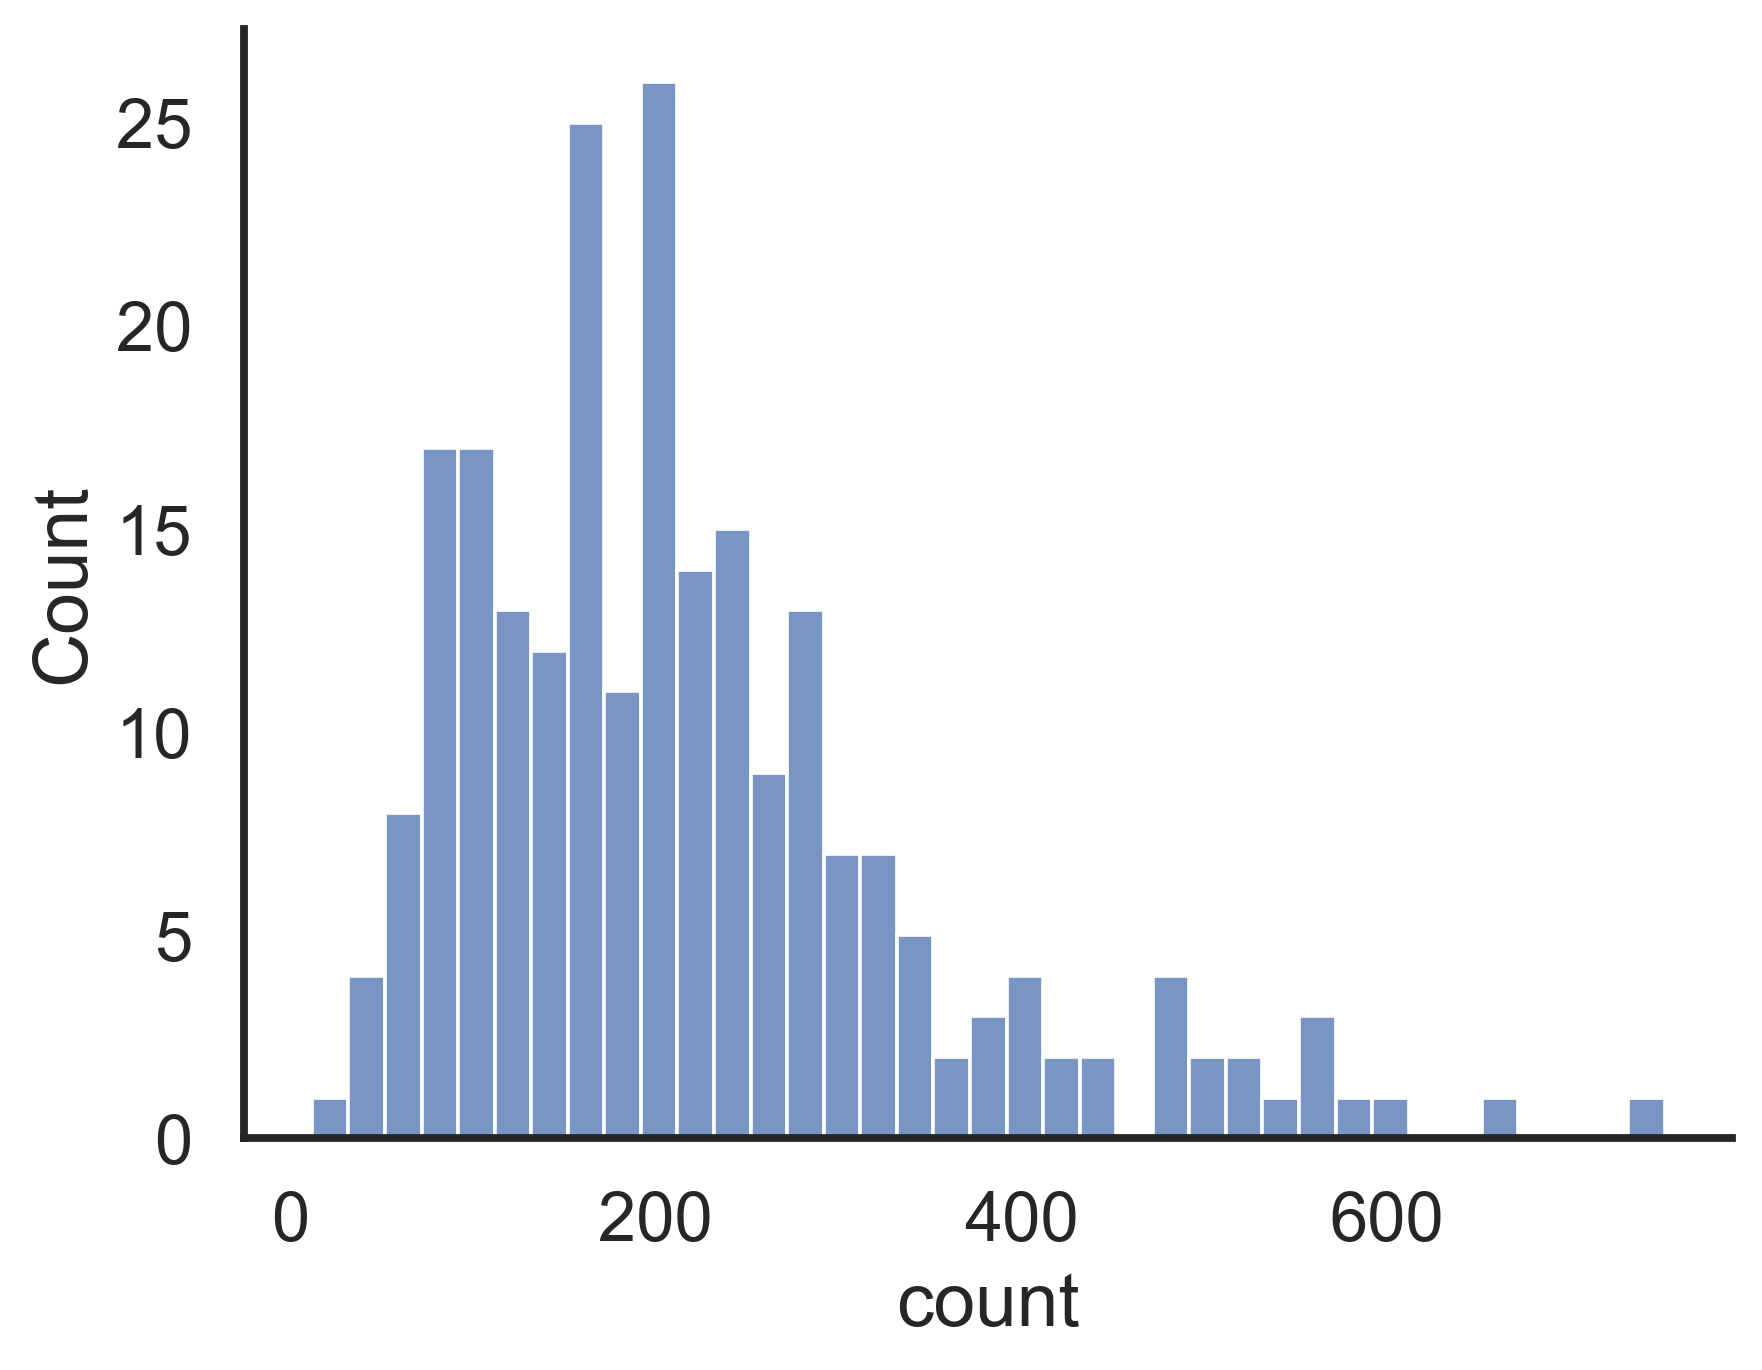

In [188]:
plt.figure(dpi = 300)
sns.histplot(quality_designed["AD"].value_counts(), binwidth = 20)
sns.despine()

In [175]:
np.mean(quality_designed["AD"].value_counts())

219.86695278969958

In [28]:
quality_not_designed = quality[quality["Designed"] == 0]
quality_not_designed

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
18,ACATTA,True,ACTTCAGCC,True,ATATCGATATACCCCT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,0
34,ATGAAA,True,CACCGATTG,True,TTTTTAAATCAAAGGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,True,0
53,GTATTG,True,AAGGATCTG,True,GATTTATGTACGGGAC,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGAGCAGCGGCGCCTACT...,True,0
58,CCAGCT,True,CAACCGTAA,True,AGTAACATGCAATCCC,True,GCCCAGGACCTGGCCGCCGCCACCTTCAGCGCCGGCATTCCCTTCA...,True,0
73,TGAGTT,True,AACGAATGC,True,AAGACATACGAGCTAT,True,GCCGAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,0
...,...,...,...,...,...,...,...,...,...
77492,GAGTTT,True,CAACGCTTC,True,GGTTGATAAGAGCAGC,True,CCCCAGTACCTGGCCGCCGCCACCTTCCAGGCCGGCATCGACTTCA...,True,0
77493,ACCGAC,True,CACCGATTG,True,AAATTAGAAAGAGATA,True,GCCCAGGACCTGCTGCTGCTGACCTTCCAGGCCGGCATTCCCTTCA...,True,0
77498,AACAAA,True,CCGATCTAT,True,TGCTGAGTGTCGAATT,True,ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,True,0
77507,GTACAA,True,CCATCGGTT,True,TTGCAGAATAGCTGCA,True,GACTCTCCCGGACACGGCTTCACACCTCACGACAGCGCTCCCGCCG...,True,0


In [29]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from joblib import Parallel, delayed

def min_hamming_distance_parallel(seq_list, ref_list, n_jobs=-1):
    """
    Compute minimum Hamming distance from each sequence in seq_list to ref_list
    in parallel with a progress bar.
    
    Returns a DataFrame with Sequence and Min_Hamming_Distance.
    """
    # Filter out "0" in ref_list
    ref_list = [s for s in ref_list if s != "0"]

    # Convert to 2D char arrays
    seq_array = np.array([list(seq) for seq in seq_list])
    ref_array = np.array([list(seq) for seq in ref_list])

    if seq_array.shape[1] != ref_array.shape[1]:
        raise ValueError("Sequences are not all the same length.")

    # Function to compute min Hamming for one sequence
    def compute_min(i):
        dists = np.sum(seq_array[i] != ref_array, axis=1)
        return dists.min()

    # Parallel computation with tqdm
    min_distances = Parallel(n_jobs=n_jobs)(
        delayed(lambda i: compute_min(i))(i) for i in tqdm(range(seq_array.shape[0]))
    )

    # Build DataFrame
    df = pd.DataFrame({
        'Sequence': seq_list,
        'Min_Hamming_Distance': min_distances
    })

    return df


In [30]:
# What is the distance between reads which pass quality check and are designed vs not designed?
quality_not_designed_dist = min_hamming_distance_parallel(quality_not_designed["AD"], quality_designed["AD"])
quality_not_designed_dist

100%|██████████| 7692/7692 [00:23<00:00, 324.43it/s]


,Sequence,Min_Hamming_Distance
18,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,4
34,GCCCAGGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,3
53,GCCCAGGACCTGGCCGCCGCCACCTTCCAGAGCAGCGGCGCCTACT...,9
58,GCCCAGGACCTGGCCGCCGCCACCTTCAGCGCCGGCATTCCCTTCA...,3
73,GCCGAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,7
...,...,...
77492,CCCCAGTACCTGGCCGCCGCCACCTTCCAGGCCGGCATCGACTTCA...,2
77493,GCCCAGGACCTGCTGCTGCTGACCTTCCAGGCCGGCATTCCCTTCA...,2
77498,ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,2
77507,GACTCTCCCGGACACGGCTTCACACCTCACGACAGCGCTCCCGCCG...,1


In [170]:
quality_not_designed_dist["Min_Hamming_Distance"].value_counts()

Min_Hamming_Distance
1      4028
3       965
2       897
4       306
6       259
       ... 
46        1
94        1
105       1
62        1
17        1
Name: count, Length: 72, dtype: int64

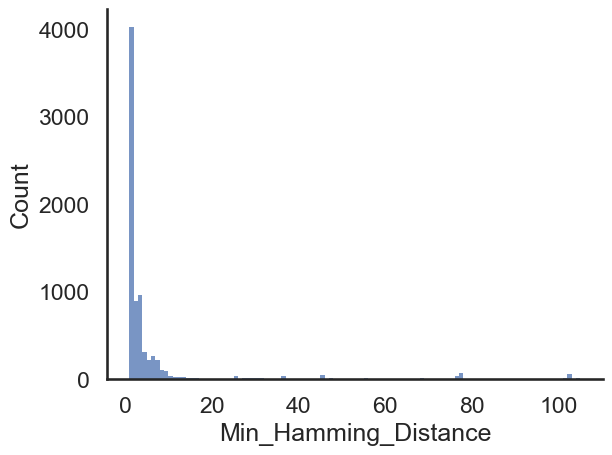

In [172]:
sns.histplot(quality_not_designed_dist["Min_Hamming_Distance"], binwidth = 1, edgecolor = 'none')
sns.despine()

In [198]:
P_0_reads = (1 - 0.001) ** 120
P_1_read = 120 * (0.001) * (1 - (0.001)) ** 119
P_2_reads = 120 * (0.001 / 3) ** 2 * ((1 - (0.001 / 3)) ** 119) ** 2
P_3_reads = 120 * (0.001 / 3) ** 3 * ((1 - (0.001 / 3)) ** 119) ** 3
P_4_reads = 120 * (0.001 / 3) ** 4 * ((1 - (0.001 / 3)) ** 119) ** 4

In [199]:
1 - P_0_reads - P_1_read - P_2_reads - P_3_reads - P_4_reads

0.006589899100226332

In [200]:
200 * (1 - P_0_reads - P_1_read - P_2_reads - P_3_reads - P_4_reads)

1.3179798200452664

In [31]:
quality_not_designed_dist[quality_not_designed_dist["Min_Hamming_Distance"] == 1]["Sequence"].iloc[2]

'AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCGAGGTGAACGCTCCCATCCAGGGCAGCAGAAACCTGCTGCAGGGCGAGGAGCTGCTGAGAGCCCTGGACCAGGTGAACGGCAGCGGCAGCGGCAGCGGCAGC'

In [32]:
quality[quality["AD"] == "AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCGAGGTGAACGCTCCCATCCAGGGCAGCAGAAACCTGCTGCAGGGCGAGGAGCTGCTGAGAGCCCTGGACCAGGTGAACGGCAGCGGCAGCGGCAGCGGCAGC"]

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
102,TATTTC,True,CCACAGAAC,True,CTTAATGTAAAAAGAG,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
124,GTCTCC,True,CCACAGAAC,True,GAAGAATGATAGCAGT,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
14674,AGACCA,True,CCACAGAAC,True,AGGAACCTTCTTCTGC,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
36468,AGACCA,True,CCACAGAAC,True,AGGAACCTTCTTCTGC,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0


In [33]:
shared_hawk = quality[quality["HawkBCs"] == "CCACAGAAC"]
shared_hawk

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
102,TATTTC,True,CCACAGAAC,True,CTTAATGTAAAAAGAG,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
119,CTTTTA,True,CCACAGAAC,True,GAAAGTGAGTTTCAAC,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,1
124,GTCTCC,True,CCACAGAAC,True,GAAGAATGATAGCAGT,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
385,TCTACC,True,CCACAGAAC,True,CTTTATTGCTTACTAA,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
528,AGACCA,True,CCACAGAAC,True,AGGAACCTTCTTCTGC,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,1
...,...,...,...,...,...,...,...,...,...
76486,TCTACC,True,CCACAGAAC,True,CTTTATTGCTTACTAA,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
76688,GTCTCC,True,CCACAGAAC,True,GTATGAGGCAAATAAA,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,1
76945,TCTACC,True,CCACAGAAC,True,CTTTATTGCTTACTAA,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
77108,GTCTCC,True,CCACAGAAC,True,TTATGAGGCAAATAAA,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,1


In [34]:
quality_designed[quality_designed["HawkBCs"] == "CCACAGAAC"]["AD"].value_counts()

AD
AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCGAGGTGAACGCTCCCATCCAGGGCAGCAGAAACCTGCTGCAGGGCGAGGAGCTGCTGAGAGCCCTGGACCAGGTGAACGGCAGCGGCAGCGGCAGCGGCAGC    427
GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGGAGATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCGCCGAGCCTCTGGTGCAGGCCCAGCAGTGGACCTGG      1
GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCGGCGCCCTGGACATGGCCGACTTCGAGTTCGAGCAGATGTTCACCGACGCCCTGGGCATCGACGAGGCCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGC      1
GAGGAGCCTCAGAGCGATCCCAGCGTGGAGCCTCCTCTGAGCCAGGAGACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGTCTCCTCTGCCCAGCCAGGCCATGGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGC      1
GCCCAGGACGCCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGG      1
GACTCTCCCGGACCCGGCGCCACACCTCACGACAGCGCTCCCTACGGCGCCCTGGACATGGCCGACGCCGAGGCCGAGCAGATGGCCACCGACGCCCTGGGCATCGACGAGTACGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGC

In [35]:
quality_designed[quality_designed["AD"] == "AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCGAGGTGAACGCTCCCATCCAGGGCAGCGACAACCTGCTGCAGGGCGAGGAGCTGCTGGACGCCCTGGACCAGGTGAACGGCAGCGGCAGCGGCAGCGGCAGC"]["HawkBCs"].value_counts()

HawkBCs
CCAAGGTGT    203
ACTTGGAGG      1
CCATCGGTT      1
CACTATGCA      1
AACGTAGGA      1
CTAAGGTGT      1
ACAACAGAC      1
CCACAGAAC      1
Name: count, dtype: int64

In [36]:
min_hamming_distance_parallel(quality_not_designed[quality_not_designed["HawkBCs"] == "AAGTTAGCC"]["AD"], quality_designed[quality_designed["HawkBCs"] == "AAGTTAGCC"]["AD"])#["Min_Hamming_Distance"].value_counts()

100%|██████████| 155/155 [00:00<00:00, 6030.21it/s]


,Sequence,Min_Hamming_Distance
83,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCA...,88
1418,GCCCAGGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTC...,102
2077,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1
2185,GCCCAGGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTC...,102
4213,GCCCAGGACCTGGACGACGACACCTTCCAGGCCGGCATTCCCTTCA...,2
...,...,...
75092,GCCCAGGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTC...,102
75140,GCCCAGGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTC...,102
75992,GCCCAGGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTC...,102
76092,GCCCAGGACCTGGCCGCCTTCACCTTCCAGGCCGGCATTCCCTTCA...,2


In [38]:
# Many reads which are not designed are close to designed
quality_not_designed_dist["Min_Hamming_Distance"].value_counts()

Min_Hamming_Distance
1      4028
3       965
2       897
4       306
6       259
       ... 
46        1
94        1
105       1
62        1
17        1
Name: count, Length: 72, dtype: int64

# Hawkins BCs

In [40]:
# How many Hawk BCs per AD?
hawk_bcs_count = initial[["AD", "HawkBCs"]].drop_duplicates().groupby("AD").count()
hawk_bcs_count.rename(columns={"HawkBCs": "HawkBCs_Count"}, inplace=True)
hawk_bcs_count = hawk_bcs_count.reset_index()
hawk_bcs_count

,AD,HawkBCs_Count
0,AATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGC...,1
1,ACACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,1
2,ACATTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,1
3,ACCAACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,1
4,ACCCAGGACATCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1
...,...,...
7310,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCG...,1
7311,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGTCGGCATTCCCTTCA...,1
7312,TTCGCCGACGCCTCCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,0
7313,TTCGCCGCCGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1


In [41]:
hawk_bcs_count["HawkBCs_Count"].value_counts()

HawkBCs_Count
1      6119
0       670
2       181
3        50
4        37
6        21
9        21
7        21
8        21
5        20
10       19
12       13
13       13
11       11
17       11
14        9
18        9
19        7
16        7
23        6
15        6
20        5
25        4
24        4
22        4
21        4
29        3
28        3
38        2
35        2
26        2
33        2
32        2
39        1
43        1
30        1
109       1
41        1
69        1
Name: count, dtype: int64

In [43]:
# What do the BCs look like if an AD has multiple -- some seem like sequencing errors, and others are distinct

# Distinct
initial[initial["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 2]["AD"].iloc[3] ]["HawkBCs"].value_counts()

HawkBCs
CCAACACTA    2
CATACGATC    1
Name: count, dtype: int64

In [44]:
# Sequencing error
initial[initial["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 2]["AD"].iloc[0] ]["HawkBCs"].value_counts()

HawkBCs
CCGTGATAC    1
CCGTGATTC    1
Name: count, dtype: int64

In [45]:
#  Distinct
initial[initial["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 3]["AD"].iloc[2] ]["HawkBCs"].value_counts()

HawkBCs
CCAGCTAAT    4
CCAACACTA    1
ACCTCGATT    1
Name: count, dtype: int64

In [46]:
initial[initial["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 4]["AD"].iloc[0] ]["HawkBCs"].value_counts()

HawkBCs
ACTCGTCGT    43
CATTCGTAC     2
AGCAGTGTA     1
CCATTAACG     1
Name: count, dtype: int64

In [47]:
initial[initial["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 5]["AD"].iloc[0] ]["HawkBCs"].value_counts()

HawkBCs
CCACTTGTC    91
CAGCGGTAT     1
CCACTGGTC     1
ACCTCGATT     1
AGTGTAACC     1
Name: count, dtype: int64

In [49]:
initial[initial["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 6]["AD"].iloc[0] ]["HawkBCs"].value_counts()

HawkBCs
ATAGGAAGG    38
ACGACCATA     1
ATAGGAAGC     1
AAGAACCAG     1
ATAGGAAGT     1
AACTTGACC     1
Name: count, dtype: int64

In [50]:
initial[initial["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 69]["AD"].iloc[0] ]["HawkBCs"].value_counts()

HawkBCs
ATAGGAAGG    34
AGATAACGC    29
AAGTCTCAC     4
ACAAGCGTT     3
AATGGTGTG     3
             ..
AAGACGGAA     1
ACAACAGAC     1
ACTCAGGTG     1
ACTGAGCGA     1
CAACAGTGC     1
Name: count, Length: 69, dtype: int64

In [ ]:
# Majority of rows only have 1 HawkBC
# So maybe if a row has multiple Hawk BCs, those are sequencing errors -- OR switching of BCs via recombination
hawk_bcs_count["HawkBCs_Count"].value_counts()

HawkBCs_Count
1      6119
0       670
2       181
3        50
4        37
6        21
9        21
7        21
8        21
5        20
10       19
12       13
13       13
11       11
17       11
14        9
18        9
19        7
16        7
23        6
15        6
20        5
25        4
24        4
22        4
21        4
29        3
28        3
38        2
35        2
26        2
33        2
32        2
39        1
43        1
30        1
109       1
41        1
69        1
Name: count, dtype: int64

# What is the distribution of average hamming distances between ADs that share a reporter BC?

In [213]:
initial_no_na = quality.dropna()
initial_no_na

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
9,CGATCC,True,CCACATCAT,True,GTAAAGTAGTAAATAC,True,AGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCG...,True,1
10,ACAGAC,True,ACAAGCGTT,True,CGATAATTTAGAATGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,1
11,GAATTG,True,AACCTACGC,True,TAGCGTATTGAGCGAA,True,GCCCAGGACCTGAGCAGCCTGACCTTCCAGGCCGGCATTCCCTTCA...,True,1
12,ACCAGA,True,ACATTGCCG,True,AGAATTTGTTCGTCTG,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGAGCAGCGGCGCCTACT...,True,1
14,GCTTGC,True,AAGGATCTG,True,TCTAATAGTGGATCGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,1
...,...,...,...,...,...,...,...,...,...
77530,GGGCGA,True,CCATCGACA,True,TAGCTAGAGTAAATTT,True,GACTCTCCCGGACCCGGCGCCACACCTCACGACAGCGCTCCCTACG...,True,1
77531,TGATCC,True,CCGTGTTGT,True,TGGTACGTAAATCTAC,True,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,True,1
77532,TATATC,True,ATAGCACAC,True,ATCTGACTACGCGGTA,True,GTCCAGGACGCCGCCGCCGCCACCGCCCAGGCCGGCATTCCCGCCA...,True,0
77533,TGAACC,True,ATCAGGACC,True,ACATATAAAAAGATAT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,True,1


In [217]:
initial_ad_bc_pairs = initial_no_na[["ADBC2", "AD"]].value_counts().reset_index()
initial_ad_bc_pairs

,ADBC2,AD,count
0,CCATAA,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,306
1,GTCAGC,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,212
2,GTACAA,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,170
3,AGTAAA,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,164
4,ATTATT,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,150
...,...,...,...
11120,CAGACA,GCCCAGGACCTGGCCGCCGCCAGCTTCCAGGCCGGCATTCCCTTCA...,1
11121,CAGACT,AGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCG...,1
11122,CAGACT,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGCCCTTCA...,1
11123,CAGACT,CAGTTCGCCCTGACCGCCGCCGACGCCAAGGCCGGCATTCCCTTCA...,1


In [130]:
initial_ad_bc_pairs["ADBC2"].value_counts()

ADBC2
AACAAA    64
GTACAA    53
CCATAA    37
TGTATA    37
TAACTA    35
          ..
GGGTTT     1
AACACA     1
AGCTTC     1
TTAACA     1
CAGTTA     1
Name: count, Length: 1574, dtype: int64

In [141]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
from tqdm.notebook import tqdm

# Example hamming distance function
def hamming_distance(seq1, seq2):
    return sum(ch1 != ch2 for ch1, ch2 in zip(seq1, seq2))

def hamming_to_most_frequent(group):
    """
    For one group of ADs with the same ADBC2:
    - Find AD with most count
    - Compute hamming distance of all ADs to that AD
    """
    # pick most_frequent AD = highest count
    most_frequent_row = group.loc[group["count"].idxmax()]
    most_frequent_ad = most_frequent_row["AD"]

    # compute distances to most_frequent
    distances = group["AD"].apply(lambda s: hamming_distance(s, most_frequent_ad))
    
    return pd.DataFrame({
        "ADBC2": group["ADBC2"].iloc[0],
        "AD": group["AD"],
        "count": group["count"],
        "Hamming_to_most_frequent": distances
    })

# --- Parallel execution ---
groups = [g for _, g in initial_ad_bc_pairs.groupby("ADBC2")]

results = Parallel(n_jobs=-1)(
    delayed(hamming_to_most_frequent)(group) for group in tqdm(groups, desc="Computing distances")
)

# Concatenate results
dist_df = pd.concat(results, ignore_index=True)

# # Quick summary
# print(dist_df.head())

# # Example distribution plot
# import matplotlib.pyplot as plt
# plt.hist(dist_df["Hamming_to_most_frequent"], bins=50)
# plt.xlabel("Hamming distance to most_frequent AD")
# plt.ylabel("Count")
# plt.title("Distribution of distances per ADBC2")
# plt.show()


Computing distances:   0%|          | 0/1574 [00:00<?, ?it/s]

In [142]:
dist_df

,ADBC2,AD,count,Hamming_to_most_frequent
0,AAAAAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,24,0
1,AAAAAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,8,15
2,AAAAAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,5,21
3,AAAAAA,ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,1,106
4,AAAAAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,15
...,...,...,...,...
11120,TTTTTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,4
11121,TTTTTT,ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,1,109
11122,TTTTTT,GCCCAGGACCTGAGCAGCAGCACCTTCCAGGCCGGCATTCCCTTCA...,1,17
11123,TTTTTT,GCCCAGGACCTGGCCCTGGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,4


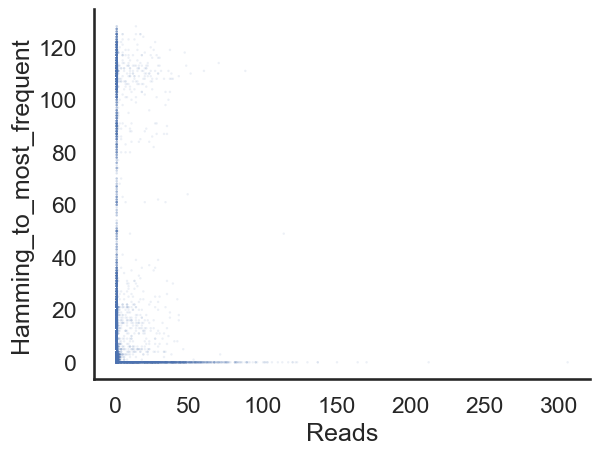

In [154]:
ax = sns.scatterplot(data = dist_df, x = "count", y = "Hamming_to_most_frequent", s = 3, edgecolor = "none", alpha = 0.1)
plt.xlabel("Reads")
sns.despine()

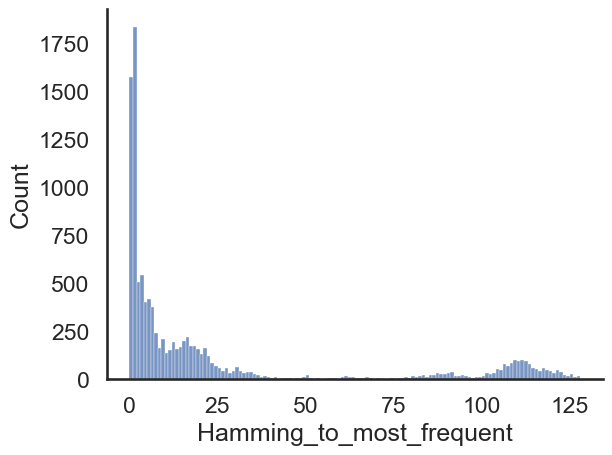

In [155]:
sns.histplot(dist_df["Hamming_to_most_frequent"], binwidth = 1)
sns.despine()

In [145]:
initial_ad_bc_pairs_with_dists = pd.merge(initial_ad_bc_pairs, dist_df)
initial_ad_bc_pairs_with_dists

,ADBC2,AD,count,Hamming_to_most_frequent
0,CCATAA,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,306,0
1,GTCAGC,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,212,0
2,GTACAA,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,170,0
3,AGTAAA,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,164,0
4,ATTATT,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,150,0
...,...,...,...,...
11120,CAGACA,GCCCAGGACCTGGCCGCCGCCAGCTTCCAGGCCGGCATTCCCTTCA...,1,6
11121,CAGACT,AGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCG...,1,114
11122,CAGACT,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGCCCTTCA...,1,93
11123,CAGACT,CAGTTCGCCCTGACCGCCGCCGACGCCAAGGCCGGCATTCCCTTCA...,1,16


In [157]:
# Calculate the average Hamming distance to the most frequent sequence per ADBC2
avg_hamming_per_adbc2 = initial_ad_bc_pairs_with_dists.groupby("ADBC2")["Hamming_to_most_frequent"].transform("mean")

# Add the calculated column to the DataFrame
initial_ad_bc_pairs_with_dists["Avg_Hamming_to_Most_Frequent"] = avg_hamming_per_adbc2
initial_ad_bc_pairs_with_dists

,ADBC2,AD,count,Hamming_to_most_frequent,Avg_Hamming_to_Most_Frequent
0,CCATAA,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,306,0,13.351351
1,GTCAGC,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,212,0,25.560000
2,GTACAA,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,170,0,66.207547
3,AGTAAA,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,164,0,67.424242
4,ATTATT,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,150,0,26.900000
...,...,...,...,...,...
11120,CAGACA,GCCCAGGACCTGGCCGCCGCCAGCTTCCAGGCCGGCATTCCCTTCA...,1,6,21.166667
11121,CAGACT,AGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCG...,1,114,21.030303
11122,CAGACT,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGCCCTTCA...,1,93,21.030303
11123,CAGACT,CAGTTCGCCCTGACCGCCGCCGACGCCAAGGCCGGCATTCCCTTCA...,1,16,21.030303


In [159]:
non_dom_reads = initial_ad_bc_pairs_with_dists[initial_ad_bc_pairs_with_dists["Hamming_to_most_frequent"] > 0]
non_dom_reads

,ADBC2,AD,count,Hamming_to_most_frequent,Avg_Hamming_to_Most_Frequent
13,ACGTTA,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,114,49,39.409091
35,AACAAA,GCCCAGGACCTGGCCGCCGCCGAGTTCCAGGCCGGCATTCCCTTCA...,88,111,93.515625
76,CAGACT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,71,3,21.030303
81,AAAGTT,CCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGTATCCCA...,70,114,29.269231
131,GGGCGA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGGCGCTCCCAGCGCCT...,60,111,75.416667
...,...,...,...,...,...
11120,CAGACA,GCCCAGGACCTGGCCGCCGCCAGCTTCCAGGCCGGCATTCCCTTCA...,1,6,21.166667
11121,CAGACT,AGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCG...,1,114,21.030303
11122,CAGACT,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGCCCTTCA...,1,93,21.030303
11123,CAGACT,CAGTTCGCCCTGACCGCCGCCGACGCCAAGGCCGGCATTCCCTTCA...,1,16,21.030303


In [161]:
non_dom_reads[non_dom_reads["count"] > 5].sort_values(by = "Avg_Hamming_to_Most_Frequent")

,ADBC2,AD,count,Hamming_to_most_frequent,Avg_Hamming_to_Most_Frequent
1401,GAACAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,10,3,2.200000
1260,GTGTGA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,13,4,3.454545
1082,CAAAAT,GCCCAGGACCTGGCCGCCGCCACCTTCAGCGCCGGCATTCCCTTCA...,17,4,4.250000
1434,CAAAAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,10,2,4.250000
1332,CATTTG,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCCTGCCCTTCA...,12,6,4.333333
...,...,...,...,...,...
618,AGCAAT,CAGTTCGCCCTGACCGCCGCCGACGCCCAGGCCGGCATTCCCTTCA...,30,116,99.461538
763,AGCAAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,25,108,99.461538
1500,TCGTTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,9,119,100.736842
448,GTTAAA,GCCCAGGCCCTGGCCGCCGCCCAGTTCCAGGCCGGCATTCCCTTCA...,37,119,113.950000


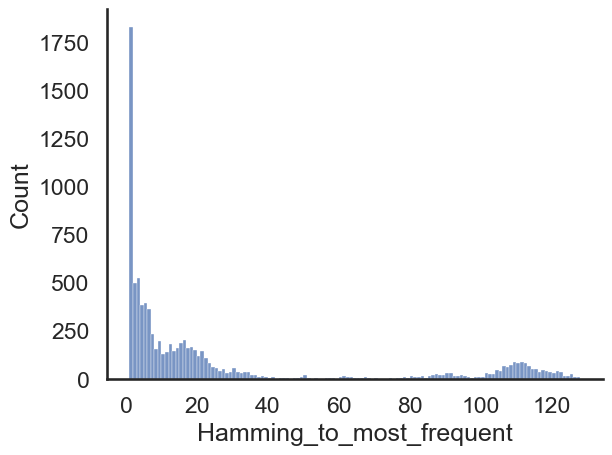

In [206]:
sns.histplot(non_dom_reads[non_dom_reads["count"] < 5]["Hamming_to_most_frequent"], binwidth = 1)
sns.despine()

In [162]:
initial_ad_bc_pairs_with_dists[initial_ad_bc_pairs_with_dists["ADBC2"] == "GAACAA"]

,ADBC2,AD,count,Hamming_to_most_frequent,Avg_Hamming_to_Most_Frequent
977,GAACAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,20,0,2.2
1401,GAACAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,10,3,2.2
9500,GAACAA,GCCCAGGAACTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,4,2.2
9508,GAACAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,1,2.2
9510,GAACAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1,3,2.2


In [165]:
initial_ad_bc_pairs_with_dists[initial_ad_bc_pairs_with_dists["ADBC2"] == "GTGTGA"]

,ADBC2,AD,count,Hamming_to_most_frequent,Avg_Hamming_to_Most_Frequent
197,GTGTGA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,53,0,3.454545
1260,GTGTGA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,13,4,3.454545
5551,GTGTGA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,1,3.454545
5552,GTGTGA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,1,3.454545
5553,GTGTGA,GCCCAGGACCTGGACGACGACACCTTCCAGGCCGGCATTCCCTTCA...,1,3,3.454545
5554,GTGTGA,GCCCAGGACCTGAGCCTGAGCACCTTCCAGGCCGGCATTCCCTTCA...,1,15,3.454545
5565,GTGTGA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,5,3.454545
5580,GTGTGA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,1,3.454545
5581,GTGTGA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,1,3.454545
5599,GTGTGA,GCCCAGGACCTGGCCGCCGCCACCTTCCTGGCCGGCATTCCCTTCA...,1,5,3.454545


In [218]:
non_dom_reads[non_dom_reads["count"] < 5].sort_values(by = ["Hamming_to_most_frequent", "Avg_Hamming_to_Most_Frequent"])

,ADBC2,AD,count,Hamming_to_most_frequent,Avg_Hamming_to_Most_Frequent
2538,GGTGGT,GCCCAGGACCTGGCCGCCGCCACCTTCCTGGCCGGCATTCCCTTCA...,1,1,0.500000
2838,GGGACA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,1,0.500000
2886,GGAATG,GCCCAGGACCTGGCCGCCGCCACCTTCCAGAGCAGCGGCGCCTACT...,1,1,0.500000
2941,TTTCCA,GCCACCGACCTGGCCGCCGCCACCTTCACCGCCGGCATTCCCTTCA...,1,1,0.500000
2952,TTTGAA,TATCCCACCGCCCATCCTCTGGTTCAGGCCCAGCAGTGGACCTGGC...,1,1,0.500000
...,...,...,...,...,...
6801,ATAAAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1,127,99.636364
4887,TCGTTT,CAGTTCGCCCTGACCGCCGCCGACGCCCAGGCCGGCATTCCCTTCA...,1,127,100.736842
9766,CTGCCG,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1,128,35.714286
7046,ATAAGA,GCCCAGGACCTGAGCCTGAGCACCTTCCAGGCCGGCATTCCCTTCA...,1,128,94.000000


In [220]:
initial_ad_bc_pairs_with_dists[initial_ad_bc_pairs_with_dists["ADBC2"] == "GGTGGT"]["AD"].iloc[1]

'GCCCAGGACCTGGCCGCCGCCACCTTCCTGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCTGAGCCTGCTGCACATGCTGTACAACGCCCTGTACAGCAGCGCCAGCACACCTCTGTATCCCACCGCCCATCCTCTGGTGCTGGCCCTGCTGTGGACCTGG'

In [212]:
initial_ad_bc_pairs_with_dists[initial_ad_bc_pairs_with_dists["ADBC2"] == "ATAAAC"]

,ADBC2,AD,count,Hamming_to_most_frequent,Avg_Hamming_to_Most_Frequent
350,ATAAAC,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGC...,42,0,99.636364
6787,ATAAAC,CCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACA...,1,110,99.636364
6795,ATAAAC,GCCCAGGACATCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,120,99.636364
6797,ATAAAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCGACTTCA...,1,127,99.636364
6798,ATAAAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCTATCCCA...,1,128,99.636364
6799,ATAAAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,125,99.636364
6800,ATAAAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,125,99.636364
6801,ATAAAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1,127,99.636364
6802,ATAAAC,GCTCCCGACCTGGCCGCCGCCACCTTTCCCGCCGGCATTCCCTTCA...,1,115,99.636364
6803,ATAAAC,TCCAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCG...,1,118,99.636364


In [ ]:
non_dom_reads[non_dom_reads["count"] > 5].sort_values(by = "Hamming_to_most_frequent").head(20)

,ADBC2,AD,count,Hamming_to_most_frequent
1559,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,8,1
1670,GAAGAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,6,1
1640,TATCTA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,6,1
1034,AGCATT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,18,1
192,GCTGGT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,53,1
1646,AAACAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,6,1
1661,TTAGCA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,6,2
1434,CAAAAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,10,2
1200,AAGGCA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,14,2
1624,CGATAT,GCCCAGGACCTGAGCCTGAGCACCTTCCAGGCCGGCATTCCCTTCA...,6,2


In [209]:
initial_ad_bc_pairs_with_dists[initial_ad_bc_pairs_with_dists["ADBC2"] == "TGAGTT"]

,ADBC2,AD,count,Hamming_to_most_frequent,Avg_Hamming_to_Most_Frequent
26,TGAGTT,GCCGAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,95,0,14.888889
1198,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCCTGCCCTTCA...,14,12,14.888889
1559,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,8,1,14.888889
4584,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGGCGCTCCCAGCGCCT...,1,26,14.888889
4585,TGAGTT,GCCCAGGACCTGAGCAGCCTGACCTTCCAGGCCGGCATTCCCTTCA...,1,8,14.888889
4586,TGAGTT,GCCCAGGACCTGAGCCTGAGCACCTTCCAGGCCGGCATTCCCTTCA...,1,8,14.888889
4587,TGAGTT,GCCCAGGACCTGAGCCTGAGCACCTTCCAGGCCGGCATTCCCTTCA...,1,87,14.888889
4588,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCAGCTTCA...,1,24,14.888889
4589,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,16,14.888889
4590,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCCTGCCCTTCA...,1,13,14.888889


In [125]:
initial_ad_bc_pairs_with_dists[initial_ad_bc_pairs_with_dists["ADBC2"] == "TGAGTT"]

,ADBC2,AD,count,Hamming_to_Dominant
39,TGAGTT,GCCGAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,95,0
1282,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCCTGCCCTTCA...,14,12
1639,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,8,1
4920,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCCTGCCCTTCA...,1,13
4923,TGAGTT,GCCCAGGACCTAGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,5
4924,TGAGTT,GCCCAGGACCTGAGCAGCCTGACCTTCCAGGCCGGCATTCCCTTCA...,1,8
4925,TGAGTT,GCCCAGGACCTGAGCCTGAGCACCTTCCAGGCCGGCATTCCCTTCA...,1,8
4926,TGAGTT,GCCCAGGACCTGAGCCTGAGCACCTTCCAGGCCGGCATTCCCTTCA...,1,87
4927,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCAGCTTCA...,1,24
4928,TGAGTT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,16


In [124]:
initial_ad_bc_pairs_with_dists[initial_ad_bc_pairs_with_dists["ADBC2"] == "GAAGAT"]

,ADBC2,AD,count,Hamming_to_Dominant
520,GAAGAT,GCCCAGGAGCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,36,0
767,GAAGAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,27,4
1761,GAAGAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,6,1
3418,GAAGAT,GCCCAGGCCCTGGCCGCCGCCCAGTTCCAGGCCGGCATTCCCTTCA...,1,15
3419,GAAGAT,GCCGAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,2
3435,GAAGAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1,3
3436,GAAGAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGCTGGGCATTCCCTTCA...,1,4
3437,GAAGAT,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,1,106
3447,GAAGAT,ACCGACTTCATCGACGAGGAGGTGTTCATGAGCTTCGTGATCGAGA...,1,111


In [99]:
# Are there BCs with low average Hamming distances and high counts?
low_hamming_bcs_high_counts = initial_ad_bc_pairs_with_dists[
    (initial_ad_bc_pairs_with_dists["Avg_Hamming"] < 5) & 
    (initial_ad_bc_pairs_with_dists["count"] > 5)
]
low_hamming_bcs_high_counts

,ADBC2,AD,count,Avg_Hamming
51,CCGTAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATC,87,1.500000
113,ACTGCC,CCTCCCACCGACGTGAGCCTGGGCGACGAGCTGCACCTGGACGGCG...,67,2.750000
164,CAACGA,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,59,2.000000
177,AACCAA,CCTCCCACCGACGTGAGCCTGGGCGACGAGCTGCACCTGGACGGCG...,58,2.000000
372,AGACCC,GCCCAGGACCT,43,0.000000
...,...,...,...,...
1711,AAACGC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,6,1.333333
1728,TTAGGA,GCCTTCGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,6,3.000000
1729,ATTTCT,GCCCAGGACCTGCTGCTGCTGACCTTCCAGGCCGGCATTCCCTTCA...,6,1.000000
1736,AATCTT,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,6,2.000000


In [101]:
initial_ad_bc_pairs_with_dists[initial_ad_bc_pairs_with_dists["ADBC2"] == "CCGTAT"] 

,ADBC2,AD,count,Avg_Hamming
51,CCGTAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATC,87,1.5
10310,CCGTAT,ACCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATC,1,1.5
10311,CCGTAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,1.5
10312,CCGTAT,GCCCAGGACCTGGCCGCCGCCGCCTTCCAGGCCGGCATC,1,1.5


In [93]:
avg_dist_df[avg_dist_df["Avg_Hamming"] <5]

,ADBC2,Avg_Hamming
6,AAAACT,4.000000
9,AAAAGT,0.666667
16,AAACCT,1.333333
18,AAACGC,1.333333
59,AACCAA,2.000000
...,...,...
1538,TTAGCC,4.000000
1539,TTAGGA,3.000000
1558,TTCCTT,2.000000
1600,TTTCCA,1.000000


In [90]:
initial_ad_bc_pairs[initial_ad_bc_pairs["ADBC2"] == "AAAAGT"] 

,ADBC2,AD,count
1152,AAAAGT,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,17
9123,AAAAGT,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,1
9124,AAAAGT,GCCTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,1


In [ ]:
initial_ad_bc_pairs[initial_ad_bc_pairs["ADBC2"] == "TTTCCA"] 

In [92]:
initial_ad_bc_pairs[initial_ad_bc_pairs["ADBC2"] == "TTTCCA"] 

,ADBC2,AD,count
1723,TTTCCA,GCCACCGACCTGGCCGCCGCCACCTTCACCGCCGGCATTCCCTTCA...,7
5237,TTTCCA,GCCACCGACCTGGCCGCCGCCACCTTCACCGCCGGCATTCCCTTCA...,1


In [91]:
initial_ad_bc_pairs[initial_ad_bc_pairs["ADBC2"] == "TTTGAC"] 

,ADBC2,AD,count
1705,TTTGAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,7
5209,TTTGAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1
5210,TTTGAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1
5228,TTTGAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1
5229,TTTGAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1
